<a href="https://colab.research.google.com/github/Ishika1512/Occupancy-Prediction-using-Spark-ML-Pipelines/blob/main/A23020_BDNS_End_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description: ***Occupancy Detection Dataset***

This dataset captures various environmental parameters in an office space, including temperature, humidity, light levels, and CO2 concentration.

 Each data point is labeled with the occupancy status, indicating whether the space is currently occupied or unoccupied.
 The dataset aims to facilitate occupancy detection and prediction, a crucial aspect for optimizing energy consumption, enhancing security, and improving workspace efficiency. The features in the dataset enable the development of machine learning models to predict occupancy based on environmental conditions. This Colab notebook explores the application of logistic regression and random forest models to achieve accurate occupancy predictions, with a focus on business implications and outcomes.

##Loading the data into a MongoDB database
Then performing EDA

---



---



In [1]:
!wget -O Occupancy_Detection_Dataset.csv -q https://github.com/Ishika1512/Occupancy-Prediction-using-Spark-ML-Pipelines/raw/main/Occupancy%20Detection%20Dataset.csv

In [2]:
pip install pandas pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 20.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from pymongo import MongoClient
import requests
from io import StringIO

In [4]:
github_raw_url = 'https://github.com/Ishika1512/Occupancy-Prediction-using-Spark-ML-Pipelines/raw/main/Occupancy%20Detection%20Dataset.csv'

# Load CSV data into Pandas DataFrame
response = requests.get(github_raw_url)
df = pd.read_csv(StringIO(response.text))

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   Unnamed: 0              date  Temperature  Humidity  Light     CO2  \
0           1  04-02-2015 17:51        23.18   27.2720  426.0  721.25   
1           2  04-02-2015 17:51        23.15   27.2675  429.5  714.00   
2           3  04-02-2015 17:53        23.15   27.2450  426.0  713.50   
3           4  04-02-2015 17:54        23.15   27.2000  426.0  708.25   
4           5  04-02-2015 17:55        23.10   27.2000  426.0  704.50   

   HumidityRatio  Occupancy  
0       0.004793          1  
1       0.004783          1  
2       0.004779          1  
3       0.004772          1  
4       0.004757          1  


In [5]:
df

Unnamed: 0              date  Temperature  Humidity  Light         CO2  \
0              1  04-02-2015 17:51        23.18   27.2720  426.0  721.250000   
1              2  04-02-2015 17:51        23.15   27.2675  429.5  714.000000   
2              3  04-02-2015 17:53        23.15   27.2450  426.0  713.500000   
3              4  04-02-2015 17:54        23.15   27.2000  426.0  708.250000   
4              5  04-02-2015 17:55        23.10   27.2000  426.0  704.500000   
...          ...               ...          ...       ...    ...         ...   
8138        8139  10-02-2015 09:29        21.05   36.0975  433.0  787.250000   
8139        8140  10-02-2015 09:29        21.05   35.9950  433.0  789.500000   
8140        8141  10-02-2015 09:30        21.10   36.0950  433.0  798.500000   
8141        8142  10-02-2015 09:32        21.10   36.2600  433.0  820.333333   
8142        8143  10-02-2015 09:33        21.10   36.2000  447.0  821.000000   

      HumidityRatio  Occupancy  
0          0.004793          1  
1          0.004783          1  
2          0.004779          1  
3          0.004772          1  
4          0.004757          1  
...             ...        ...  
8138       0.005579          1  
8139       0.005563          1  
8140       0.005596          1  
8141       0.005621          1  
8142       0.005612          1  

[8143 rows x 8 columns]

In [6]:
data=df.to_dict(orient="records")
data

[{'Unnamed: 0': 1,
  'date': '04-02-2015 17:51',
  'Temperature': 23.18,
  'Humidity': 27.272,
  'Light': 426.0,
  'CO2': 721.25,
  'HumidityRatio': 0.004792988,
  'Occupancy': 1},
 {'Unnamed: 0': 2,
  'date': '04-02-2015 17:51',
  'Temperature': 23.15,
  'Humidity': 27.2675,
  'Light': 429.5,
  'CO2': 714.0,
  'HumidityRatio': 0.004783441,
  'Occupancy': 1},
 {'Unnamed: 0': 3,
  'date': '04-02-2015 17:53',
  'Temperature': 23.15,
  'Humidity': 27.245,
  'Light': 426.0,
  'CO2': 713.5,
  'HumidityRatio': 0.004779464,
  'Occupancy': 1},
 {'Unnamed: 0': 4,
  'date': '04-02-2015 17:54',
  'Temperature': 23.15,
  'Humidity': 27.2,
  'Light': 426.0,
  'CO2': 708.25,
  'HumidityRatio': 0.004771509,
  'Occupancy': 1},
 {'Unnamed: 0': 5,
  'date': '04-02-2015 17:55',
  'Temperature': 23.1,
  'Humidity': 27.2,
  'Light': 426.0,
  'CO2': 704.5,
  'HumidityRatio': 0.004756993,
  'Occupancy': 1},
 {'Unnamed: 0': 6,
  'date': '04-02-2015 17:55',
  'Temperature': 23.1,
  'Humidity': 27.2,
  'Light':

In [7]:
!curl -fsSL https://pgp.mongodb.com/server-6.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-6.0.gpg \
   --dearmor
# ------------
!echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list
# ------------
!sudo apt-get update > /dev/null
# --------------------
!sudo apt-get install -y mongodb-org > /dev/null
# -----
!sudo mkdir -p /var/log/mongodb /var/lib/mongodb
# ---------
!sudo chown `whoami` /var/lib/mongodb /var/log/mongodb/

deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-6.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 9.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [8]:
!nohup mongod --config /etc/mongod.conf &

nohup: appending output to 'nohup.out'


In [9]:
url = "mongodb://localhost:27017"
client = MongoClient(url)
client.list_database_names()

['admin', 'config', 'local']

In [10]:
db = client["BDNS"]

In [11]:
client.list_database_names()

['admin', 'config', 'local']

In [12]:
table = db.BDNS
table.count_documents({})

0

In [13]:
db.BDNS.insert_many(data)

InsertManyResult([ObjectId('659a9e9d56de9e0bf277dbd9'), ObjectId('659a9e9d56de9e0bf277dbda'), ObjectId('659a9e9d56de9e0bf277dbdb'), ObjectId('659a9e9d56de9e0bf277dbdc'), ObjectId('659a9e9d56de9e0bf277dbdd'), ObjectId('659a9e9d56de9e0bf277dbde'), ObjectId('659a9e9d56de9e0bf277dbdf'), ObjectId('659a9e9d56de9e0bf277dbe0'), ObjectId('659a9e9d56de9e0bf277dbe1'), ObjectId('659a9e9d56de9e0bf277dbe2'), ObjectId('659a9e9d56de9e0bf277dbe3'), ObjectId('659a9e9d56de9e0bf277dbe4'), ObjectId('659a9e9d56de9e0bf277dbe5'), ObjectId('659a9e9d56de9e0bf277dbe6'), ObjectId('659a9e9d56de9e0bf277dbe7'), ObjectId('659a9e9d56de9e0bf277dbe8'), ObjectId('659a9e9d56de9e0bf277dbe9'), ObjectId('659a9e9d56de9e0bf277dbea'), ObjectId('659a9e9d56de9e0bf277dbeb'), ObjectId('659a9e9d56de9e0bf277dbec'), ObjectId('659a9e9d56de9e0bf277dbed'), ObjectId('659a9e9d56de9e0bf277dbee'), ObjectId('659a9e9d56de9e0bf277dbef'), ObjectId('659a9e9d56de9e0bf277dbf0'), ObjectId('659a9e9d56de9e0bf277dbf1'), ObjectId('659a9e9d56de9e0bf277db

In [14]:
db.list_collection_names()

['BDNS']

In [15]:
ab=db.BDNS

In [16]:
cd=db.BDNS.find()

In [17]:
list_cursor=list(cd)

In [18]:
print(list_cursor)

[{'_id': ObjectId('659a9e9d56de9e0bf277dbd9'), 'Unnamed: 0': 1, 'date': '04-02-2015 17:51', 'Temperature': 23.18, 'Humidity': 27.272, 'Light': 426.0, 'CO2': 721.25, 'HumidityRatio': 0.004792988, 'Occupancy': 1}, {'_id': ObjectId('659a9e9d56de9e0bf277dbda'), 'Unnamed: 0': 2, 'date': '04-02-2015 17:51', 'Temperature': 23.15, 'Humidity': 27.2675, 'Light': 429.5, 'CO2': 714.0, 'HumidityRatio': 0.004783441, 'Occupancy': 1}, {'_id': ObjectId('659a9e9d56de9e0bf277dbdb'), 'Unnamed: 0': 3, 'date': '04-02-2015 17:53', 'Temperature': 23.15, 'Humidity': 27.245, 'Light': 426.0, 'CO2': 713.5, 'HumidityRatio': 0.004779464, 'Occupancy': 1}, {'_id': ObjectId('659a9e9d56de9e0bf277dbdc'), 'Unnamed: 0': 4, 'date': '04-02-2015 17:54', 'Temperature': 23.15, 'Humidity': 27.2, 'Light': 426.0, 'CO2': 708.25, 'HumidityRatio': 0.004771509, 'Occupancy': 1}, {'_id': ObjectId('659a9e9d56de9e0bf277dbdd'), 'Unnamed: 0': 5, 'date': '04-02-2015 17:55', 'Temperature': 23.1, 'Humidity': 27.2, 'Light': 426.0, 'CO2': 704.5

In [19]:
odd =pd.DataFrame(list_cursor)

In [20]:
odd.head()

_id  Unnamed: 0              date  Temperature  \
0  659a9e9d56de9e0bf277dbd9           1  04-02-2015 17:51        23.18   
1  659a9e9d56de9e0bf277dbda           2  04-02-2015 17:51        23.15   
2  659a9e9d56de9e0bf277dbdb           3  04-02-2015 17:53        23.15   
3  659a9e9d56de9e0bf277dbdc           4  04-02-2015 17:54        23.15   
4  659a9e9d56de9e0bf277dbdd           5  04-02-2015 17:55        23.10   

   Humidity  Light     CO2  HumidityRatio  Occupancy  
0   27.2720  426.0  721.25       0.004793          1  
1   27.2675  429.5  714.00       0.004783          1  
2   27.2450  426.0  713.50       0.004779          1  
3   27.2000  426.0  708.25       0.004772          1  
4   27.2000  426.0  704.50       0.004757          1

In [21]:
type(odd)

pandas.core.frame.DataFrame

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(odd.describe())



Descriptive statistics:
        Unnamed: 0  Temperature     Humidity        Light          CO2  \
count  8143.000000  8143.000000  8143.000000  8143.000000  8143.000000   
mean   4072.000000    20.619084    25.731507   119.519375   606.546243   
std    2350.825954     1.016916     5.531211   194.755805   314.320877   
min       1.000000    19.000000    16.745000     0.000000   412.750000   
25%    2036.500000    19.700000    20.200000     0.000000   439.000000   
50%    4072.000000    20.390000    26.222500     0.000000   453.500000   
75%    6107.500000    21.390000    30.533333   256.375000   638.833333   
max    8143.000000    23.180000    39.117500  1546.333333  2028.500000   

       HumidityRatio    Occupancy  
count    8143.000000  8143.000000  
mean        0.003863     0.212330  
std         0.000852     0.408982  
min         0.002674     0.000000  
25%         0.003078     0.000000  
50%         0.003801     0.000000  
75%         0.004352     0.000000  
max         0.006476

## EDA using MongoDB

---



---



---



In [24]:
collection = db['odd']

In [25]:
document_count = collection.count_documents({})
print(f"Total Documents in Collection: {document_count}")


Total Documents in Collection: 0


In [26]:
missing_values = collection.count_documents({"Temperature": {"$exists": False}})
print(f"Count of Missing Temperature Values: {missing_values}")


Count of Missing Temperature Values: 0


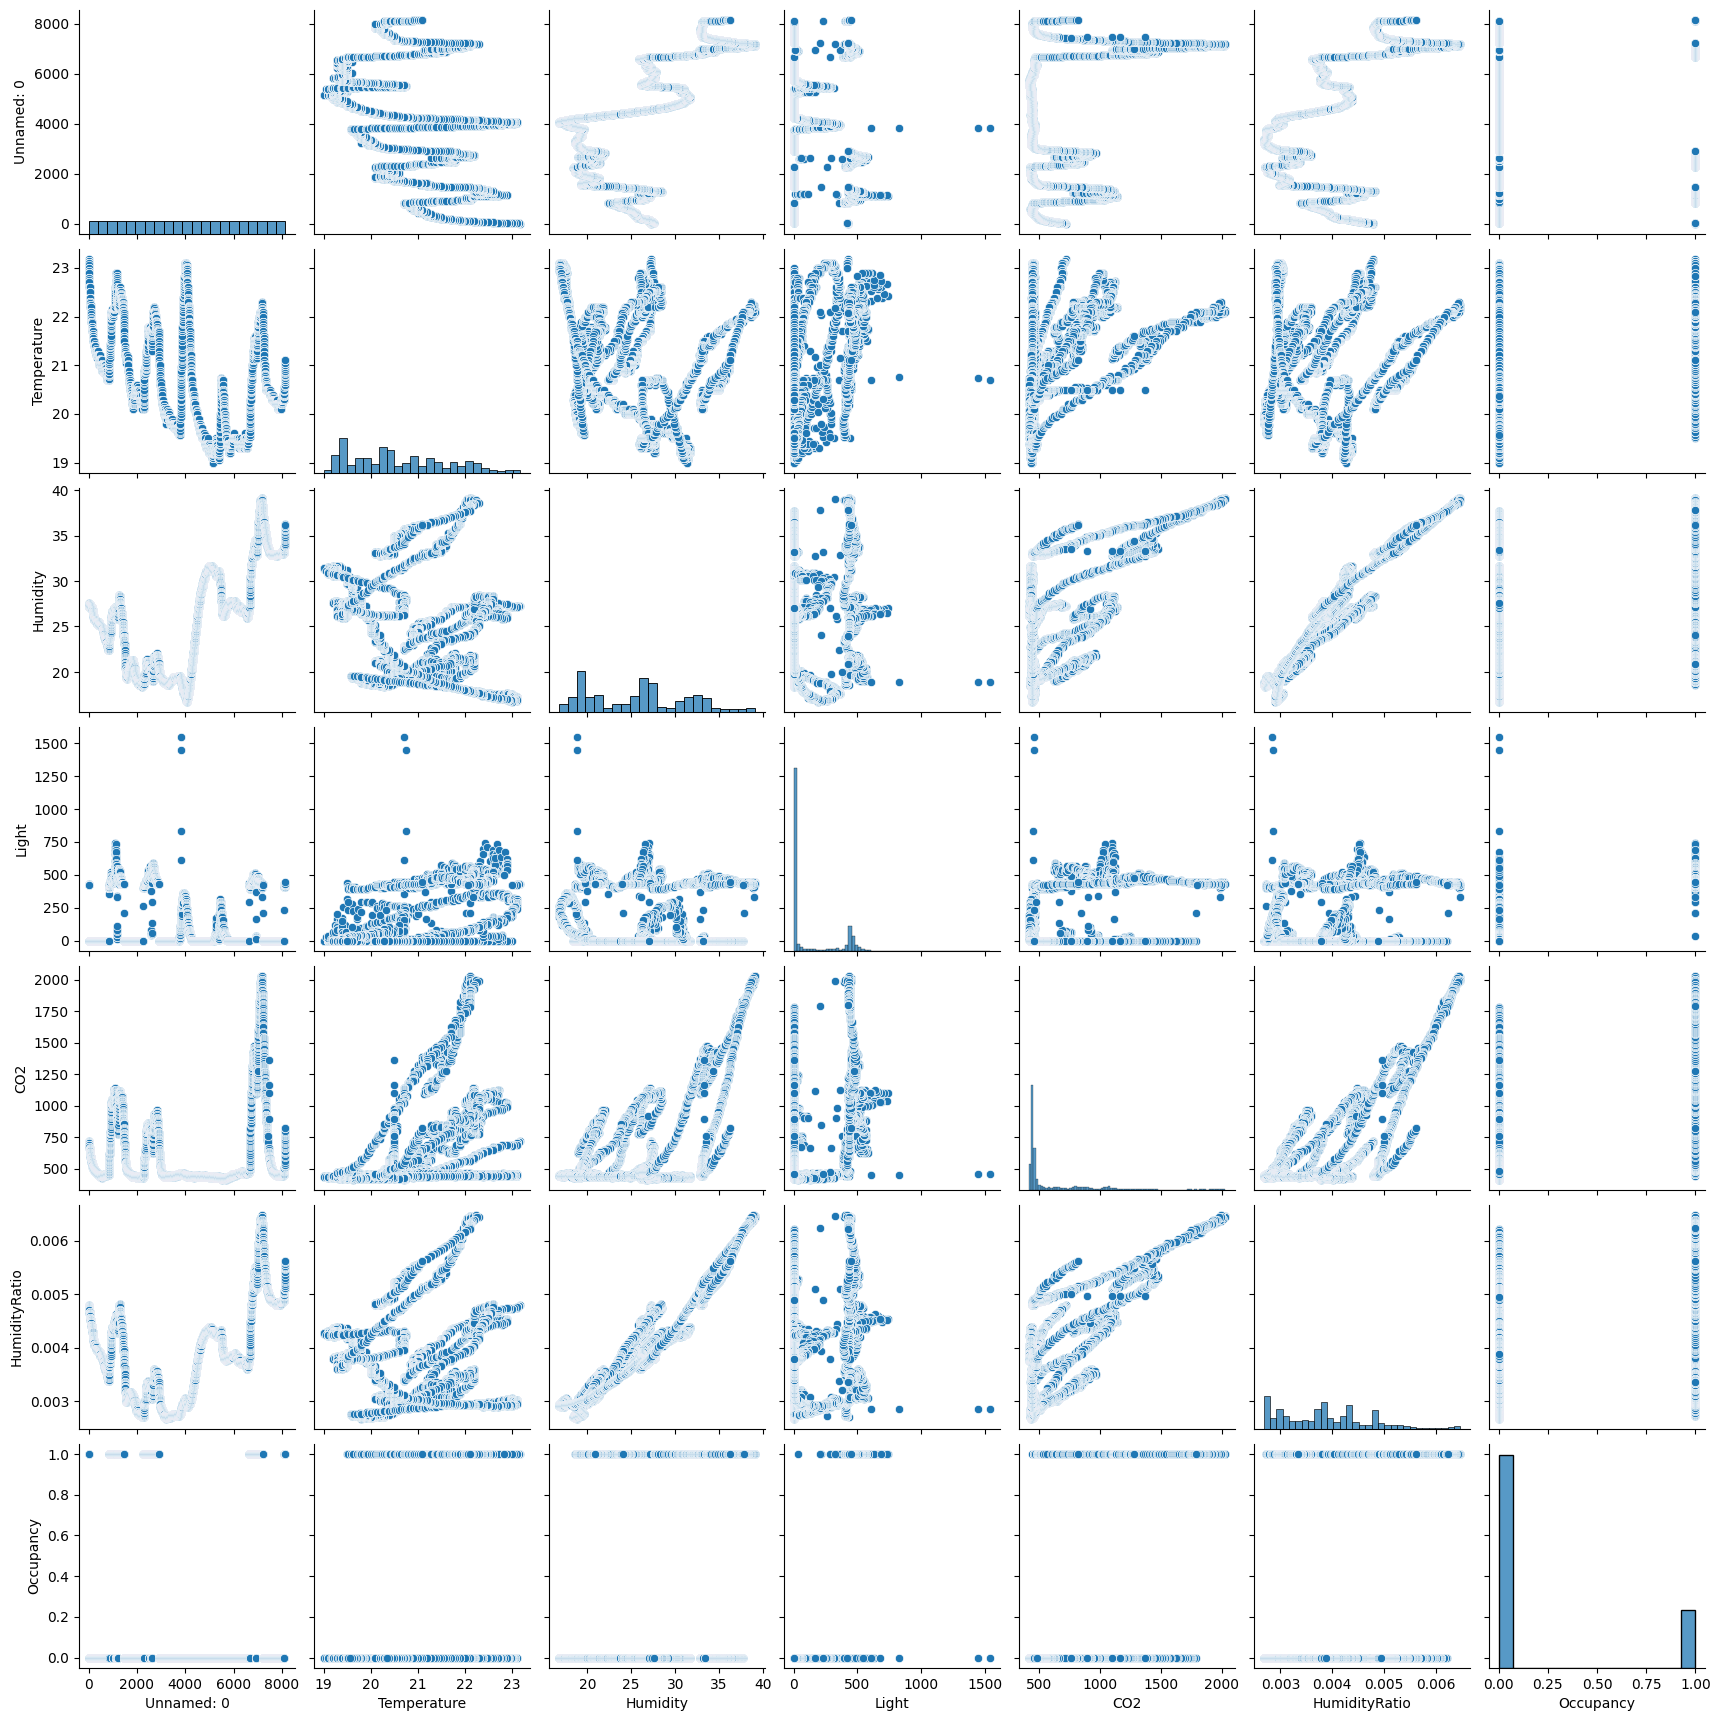

In [27]:
# Pairplot for numerical columns
sns.pairplot(odd)
plt.show()

<ipython-input-28-75d388e7a6a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = odd.corr()


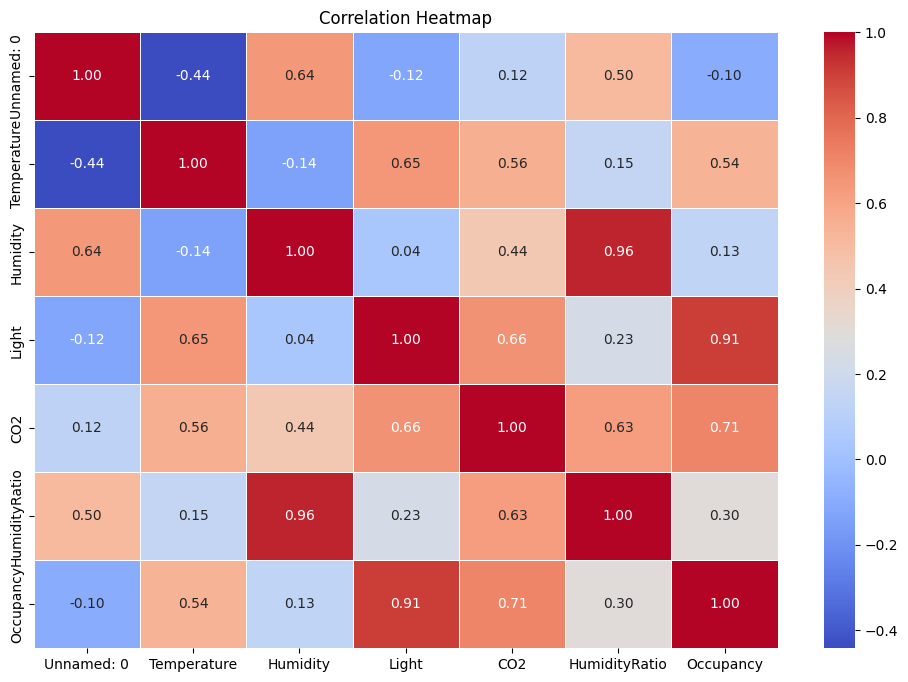

In [28]:
# Correlation heatmap
correlation_matrix = odd.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

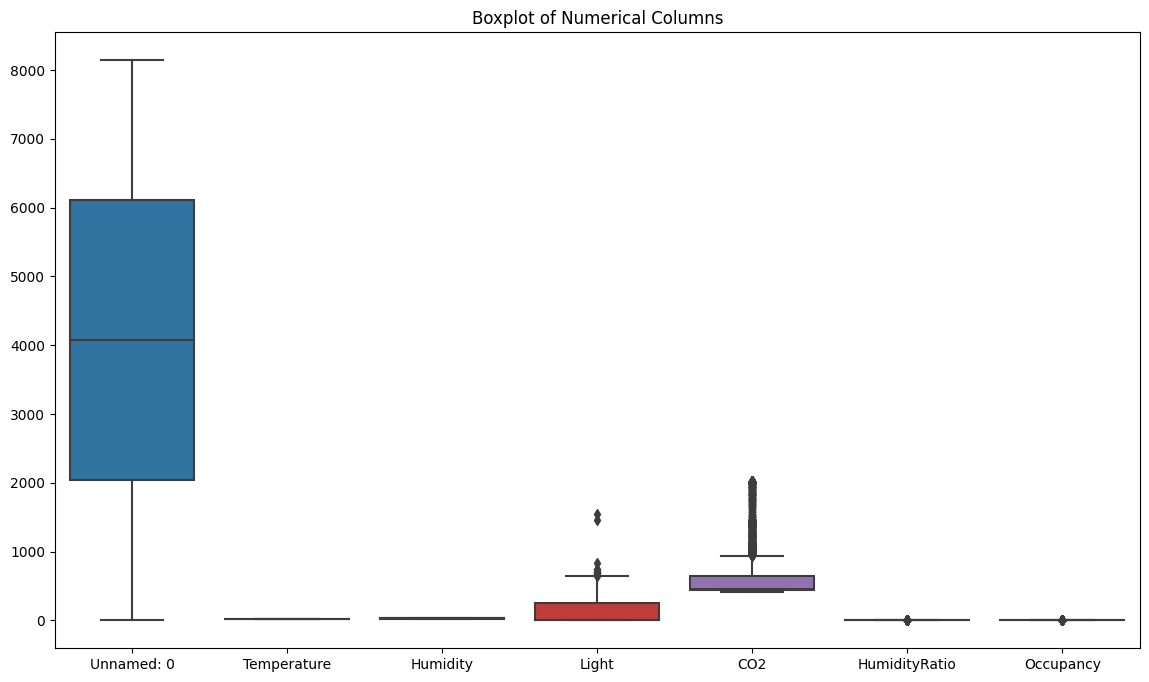

In [29]:
# Boxplot for numerical columns
plt.figure(figsize=(14, 8))
sns.boxplot(data=odd.select_dtypes(include=['int', 'float']))
plt.title("Boxplot of Numerical Columns")
plt.show()

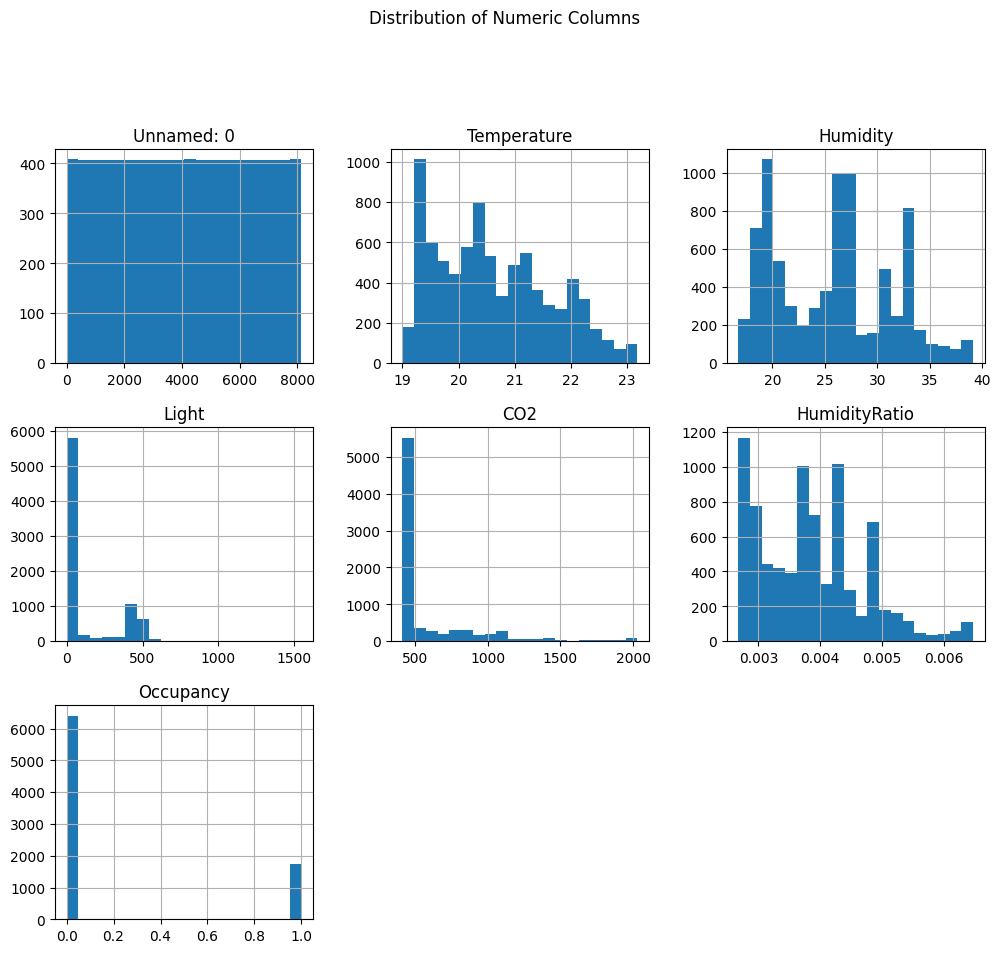

In [30]:
# Histogram for each numeric column
odd.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numeric Columns", y=1.02)
plt.show()

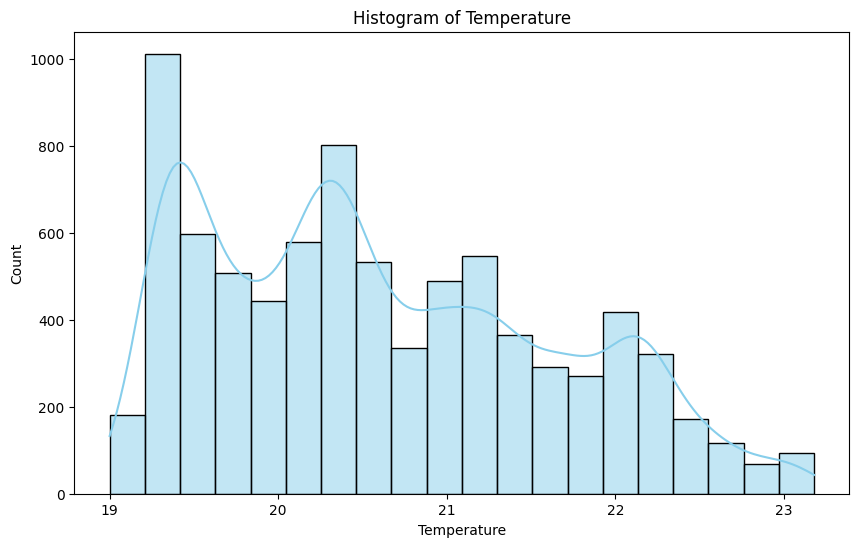

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(odd['Temperature'], bins=20, kde=True, color='skyblue')
plt.title("Histogram of Temperature")
plt.show()


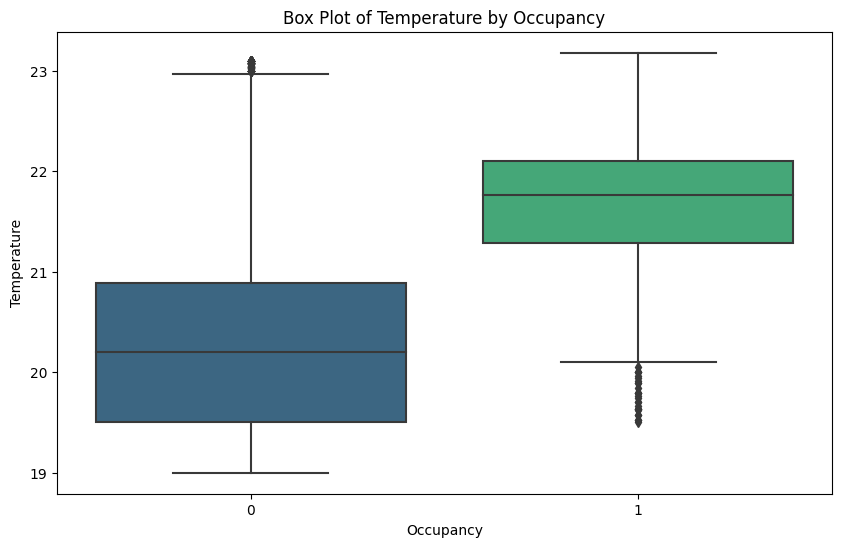

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupancy', y='Temperature', data=odd, palette='viridis')
plt.title("Box Plot of Temperature by Occupancy")
plt.show()


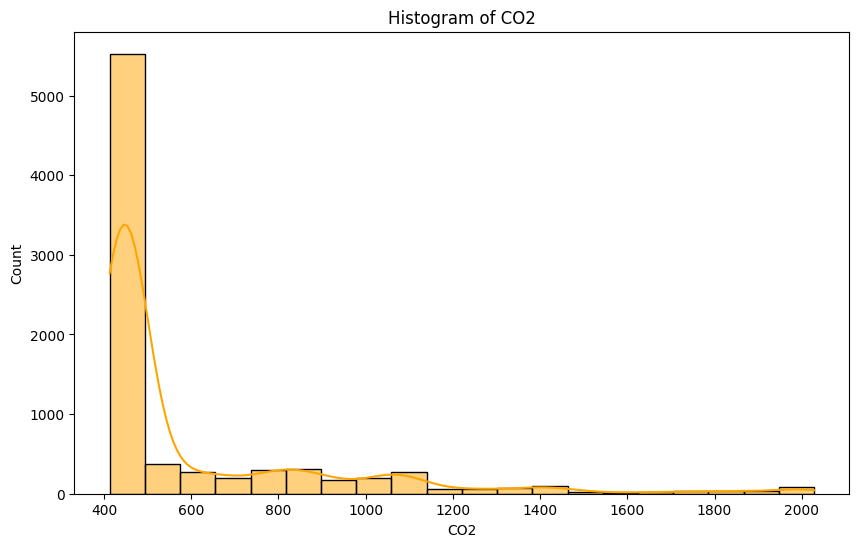

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(odd['CO2'], bins=20, kde=True, color='orange')
plt.title("Histogram of CO2")
plt.show()


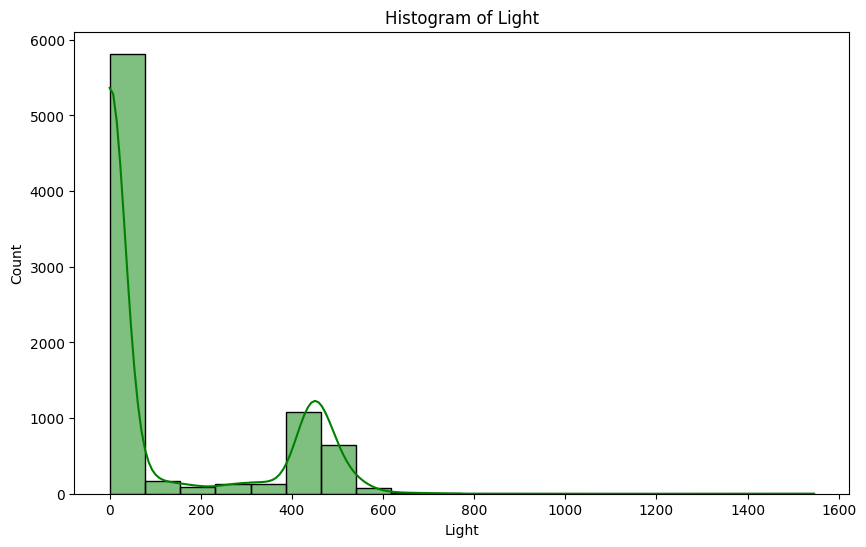

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(odd['Light'], bins=20, kde=True, color='green')
plt.title("Histogram of Light")
plt.show()


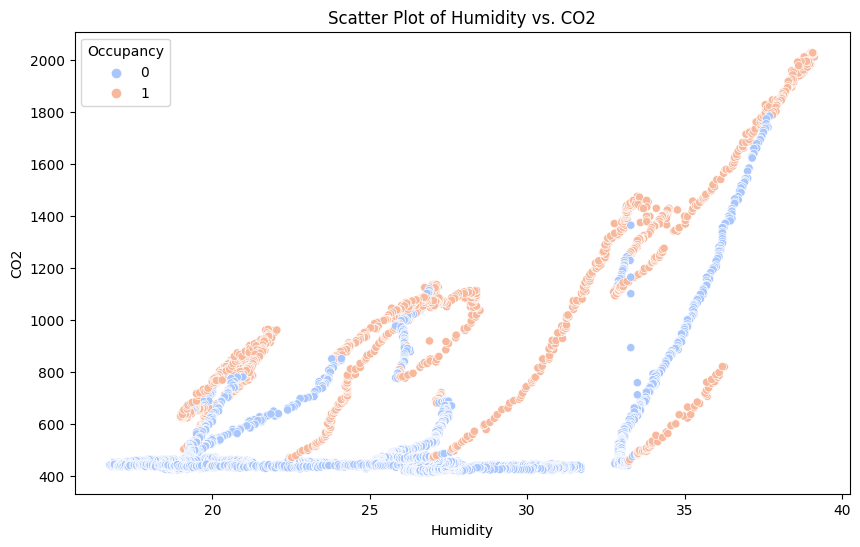

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='CO2', data=odd, hue='Occupancy', palette='coolwarm')
plt.title("Scatter Plot of Humidity vs. CO2")
plt.show()


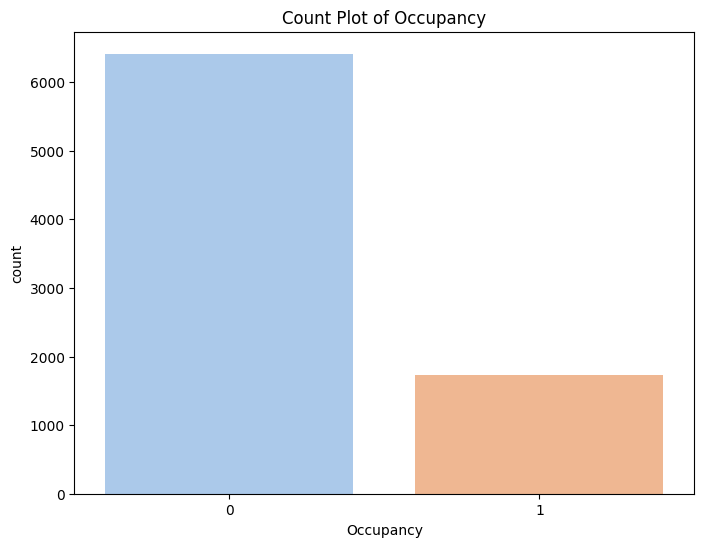

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Occupancy', data=odd, palette='pastel')
plt.title("Count Plot of Occupancy")
plt.show()


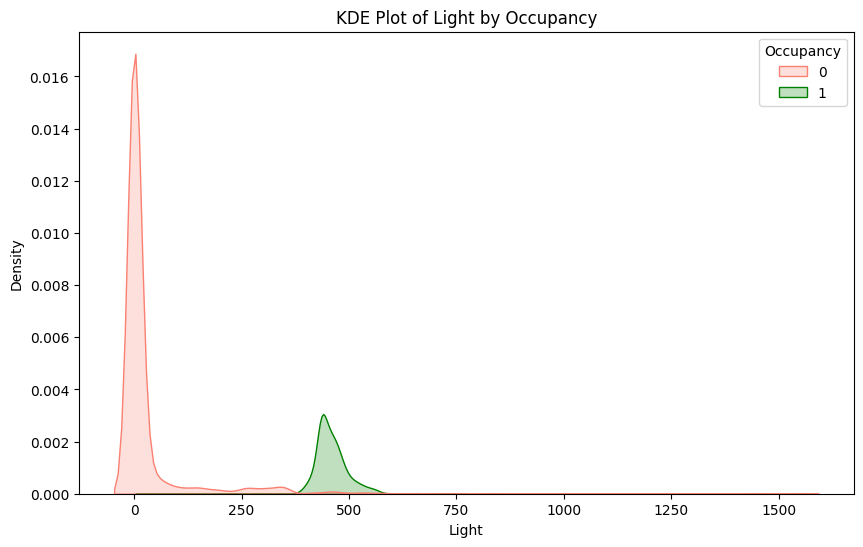

In [37]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Light', hue='Occupancy', data=odd, fill=True, palette={0: 'salmon', 1: 'green'})
plt.title("KDE Plot of Light by Occupancy")
plt.show()



## SPARK
Imorting Data and required libraries

---



---




## EDA in SPARK

In [38]:
!pip3 -q install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Praxis').master("local[*]").getOrCreate()
sc = spark.sparkContext
#sc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [39]:
from pyspark.sql.functions import mean
from pyspark.ml.feature import (VectorAssembler,OneHotEncoder, StringIndexer)
from pyspark.ml import Pipeline
from pyspark.ml import PipelineModel
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [40]:
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.stat import Statistics
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix

In [41]:
#Loading dataset into spark dataframe
odd = spark.read.csv('Occupancy_Detection_Dataset.csv', inferSchema=True,header=True)
#Show First N Rows:
odd.show(5)

+---+----------------+-----------+--------+-----+------+-------------+---------+
|_c0|            date|Temperature|Humidity|Light|   CO2|HumidityRatio|Occupancy|
+---+----------------+-----------+--------+-----+------+-------------+---------+
|  1|04-02-2015 17:51|      23.18|  27.272|426.0|721.25|  0.004792988|        1|
|  2|04-02-2015 17:51|      23.15| 27.2675|429.5| 714.0|  0.004783441|        1|
|  3|04-02-2015 17:53|      23.15|  27.245|426.0| 713.5|  0.004779464|        1|
|  4|04-02-2015 17:54|      23.15|    27.2|426.0|708.25|  0.004771509|        1|
|  5|04-02-2015 17:55|       23.1|    27.2|426.0| 704.5|  0.004756993|        1|
+---+----------------+-----------+--------+-----+------+-------------+---------+
only showing top 5 rows



In [42]:
odd

DataFrame[_c0: int, date: string, Temperature: double, Humidity: double, Light: double, CO2: double, HumidityRatio: double, Occupancy: int]

In [43]:
print((odd.count(),len(odd.columns)))

(8143, 8)


In [44]:
#Display Schema:
odd.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Light: double (nullable = true)
 |-- CO2: double (nullable = true)
 |-- HumidityRatio: double (nullable = true)
 |-- Occupancy: integer (nullable = true)



In [45]:
# Summary Statistics
odd.describe().show()


+-------+-----------------+----------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+
|summary|              _c0|            date|       Temperature|          Humidity|             Light|              CO2|       HumidityRatio|          Occupancy|
+-------+-----------------+----------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+
|  count|             8143|            8143|              8143|              8143|              8143|             8143|                8143|               8143|
|   mean|           4072.0|            NULL|20.619083640347053|25.731507286434336|119.51937451379504|606.5462431938236|0.003862506689549306| 0.2123296082524868|
| stddev|2350.825954141792|            NULL| 1.016916441114931| 5.531210999580654|194.75580479828477|314.3208768786643|8.523313154033151E-4|0.40898201283831825|
|    min|                1|04-02-2

In [46]:
# Count missing values
from pyspark.sql.functions import col, sum

missing_values = odd.agg(*[sum(col(c).isNull().cast("int")).alias(c + "_missing") for c in odd.columns]).show()


+-----------+------------+-------------------+----------------+-------------+-----------+---------------------+-----------------+
|_c0_missing|date_missing|Temperature_missing|Humidity_missing|Light_missing|CO2_missing|HumidityRatio_missing|Occupancy_missing|
+-----------+------------+-------------------+----------------+-------------+-----------+---------------------+-----------------+
|          0|           0|                  0|               0|            0|          0|                    0|                0|
+-----------+------------+-------------------+----------------+-------------+-----------+---------------------+-----------------+



In [47]:
# Correlation Matrix:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

feature_columns = ['Temperature', 'Humidity', 'Light', 'CO2']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
odd_assembled = assembler.transform(odd)
pearson_matrix = Correlation.corr(odd_assembled, "features").head()


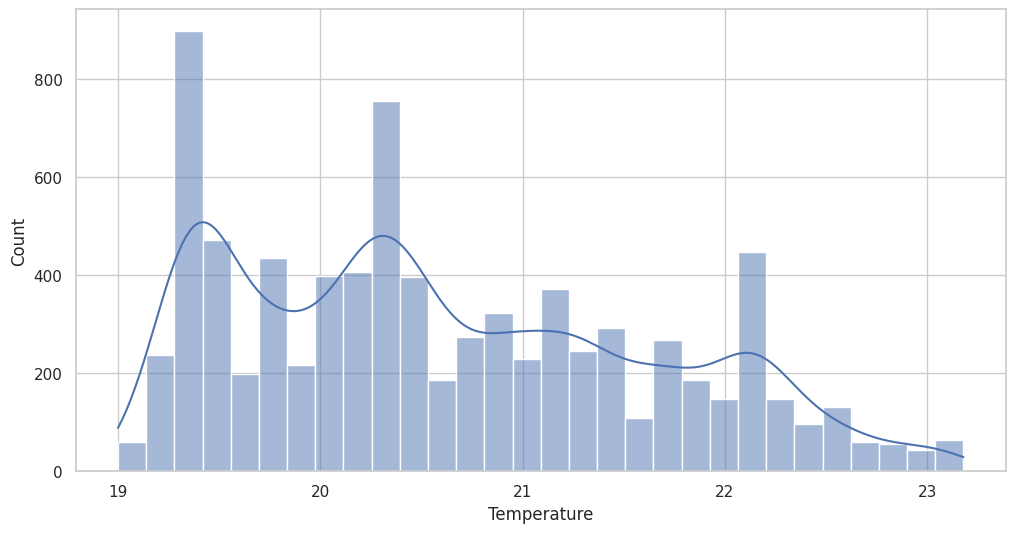

In [48]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(odd.toPandas(), x='Temperature', bins=30, kde=True)
plt.show()


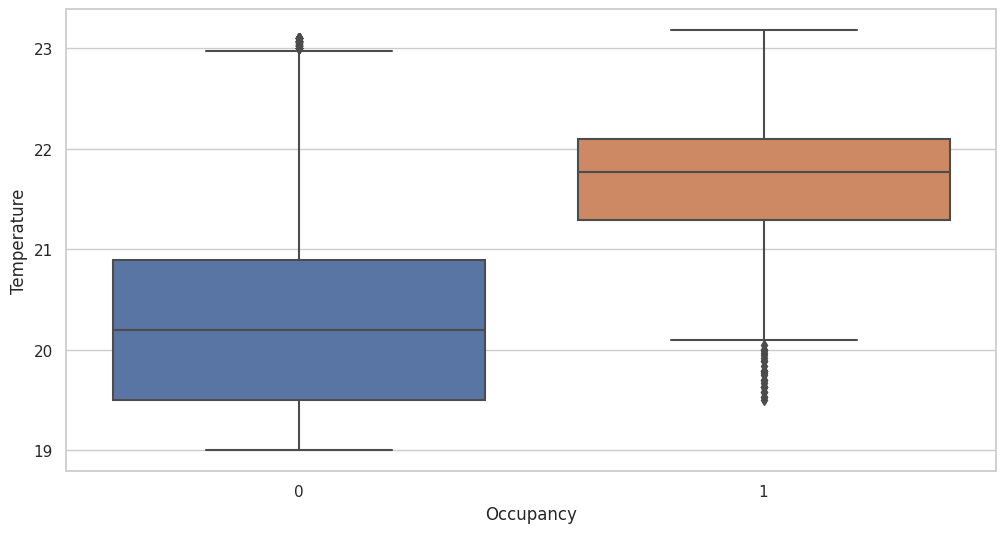

In [49]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupancy', y='Temperature', data=odd.toPandas())
plt.show()


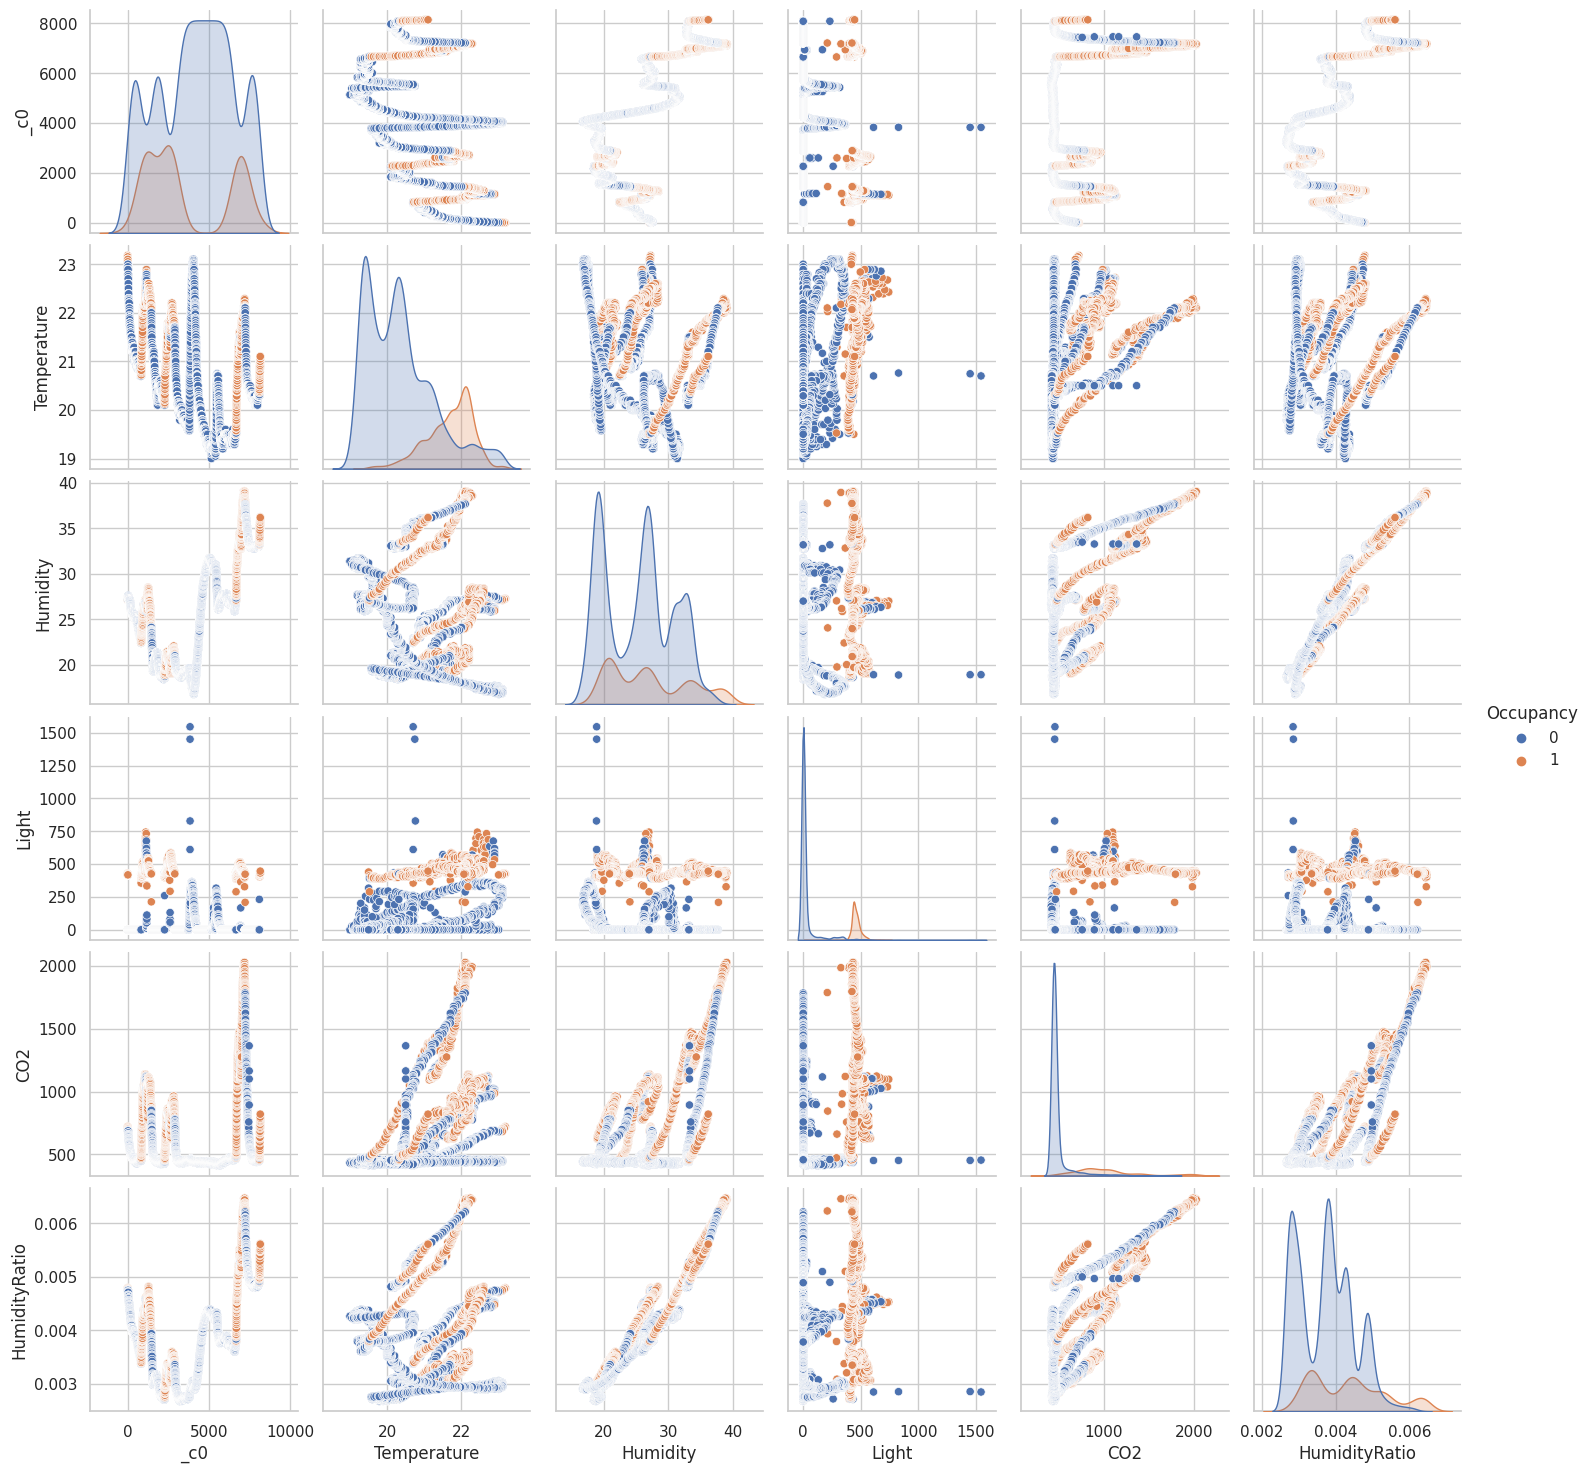

In [50]:
# Pairplot
sns.pairplot(odd.toPandas(), hue='Occupancy', diag_kind='kde')
plt.show()


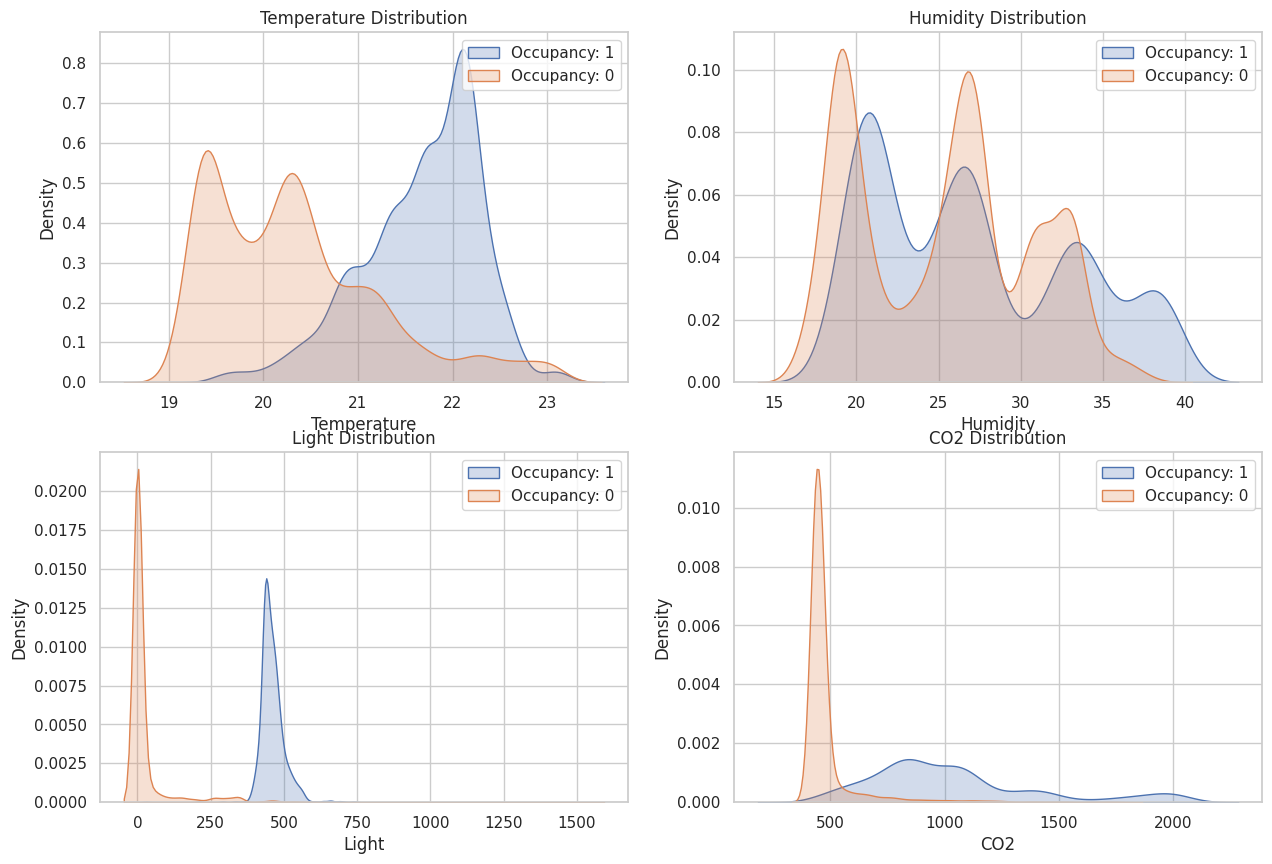

In [51]:
# Feature Distribution
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)

    # Separate KDE plots for each 'Occupancy' category
    for category in odd.select('Occupancy').distinct().toPandas()['Occupancy']:
        sns.kdeplot(odd.filter(col('Occupancy') == category).toPandas()[feature], label=f'Occupancy: {category}', fill=True)

    plt.title(f'{feature} Distribution')
    plt.legend()

plt.show()



In [52]:
# Cross Tabulation
odd.crosstab('Temperature', 'Occupancy').show()


+---------------------+---+---+
|Temperature_Occupancy|  0|  1|
+---------------------+---+---+
|          22.03333333|  2|  4|
|                 20.5|312| 16|
|          20.56666667|  5|  1|
|          20.96333333|  7|  2|
|              21.2225|  1|  2|
|               20.315|  5|  1|
|          20.66666667|  7|  0|
|          19.42666667| 21|  0|
|              20.2225|  3|  1|
|                21.65|  6|  9|
|          20.53333333|  7|  0|
|               20.745| 10|  2|
|                22.55|  4|  5|
|                19.76|  5|  0|
|              21.2675|  2|  2|
|               22.745|  2|  0|
|                20.76|  2|  0|
|                22.39| 28| 37|
|          21.85666667|  3|  0|
|                 22.0| 18| 63|
+---------------------+---+---+
only showing top 20 rows



In [53]:
distinct_counts = {col: odd.select(col).distinct().count() for col in odd.columns}
print(distinct_counts)

{'_c0': 8143, 'date': 6514, 'Temperature': 265, 'Humidity': 1325, 'Light': 889, 'CO2': 2282, 'HumidityRatio': 3581, 'Occupancy': 2}


In [54]:
avg_occupancy = odd.groupBy('Occupancy').agg({'Temperature': 'avg', 'Humidity': 'avg', 'Light': 'avg', 'CO2': 'avg'}).show()


+---------+------------------+------------------+------------------+------------------+
|Occupancy|  avg(Temperature)|        avg(Light)|     avg(Humidity)|          avg(CO2)|
+---------+------------------+------------------+------------------+------------------+
|        1| 21.67319177750723| 459.8543474070563|27.147938210902225|1037.7047859989593|
|        0|20.334931322111757|27.776442157629074|25.349684856061412|490.32031233787023|
+---------+------------------+------------------+------------------+------------------+



In [55]:
for col in feature_columns:
    odd.groupBy('Occupancy', col).count().show()


+---------+-----------+-----+
|Occupancy|Temperature|count|
+---------+-----------+-----+
|        1|20.96333333|    2|
|        0|23.06666667|    4|
|        0|      22.39|   28|
|        1|     20.815|    4|
|        0|     22.025|    1|
|        0|     20.365|    3|
|        0|     20.445|   37|
|        1|     21.365|    7|
|        1|20.37333333|    1|
|        0|    19.9725|    1|
|        1|20.82333333|    4|
|        0|    20.4725|    2|
|        1|     20.125|    2|
|        0|20.03333333|    5|
|        0|    19.4175|    8|
|        0|      22.65|    3|
|        1|20.92666667|    3|
|        0|      19.23|   24|
|        1|22.16666667|    5|
|        1|    22.4725|    3|
+---------+-----------+-----+
only showing top 20 rows

+---------+-----------+-----+
|Occupancy|   Humidity|count|
+---------+-----------+-----+
|        0|      23.29|   13|
|        0|23.06666667|    2|
|        1|    24.5175|    1|
|        0|    25.8925|    1|
|        1|26.32333333|    3|
|        1|20.

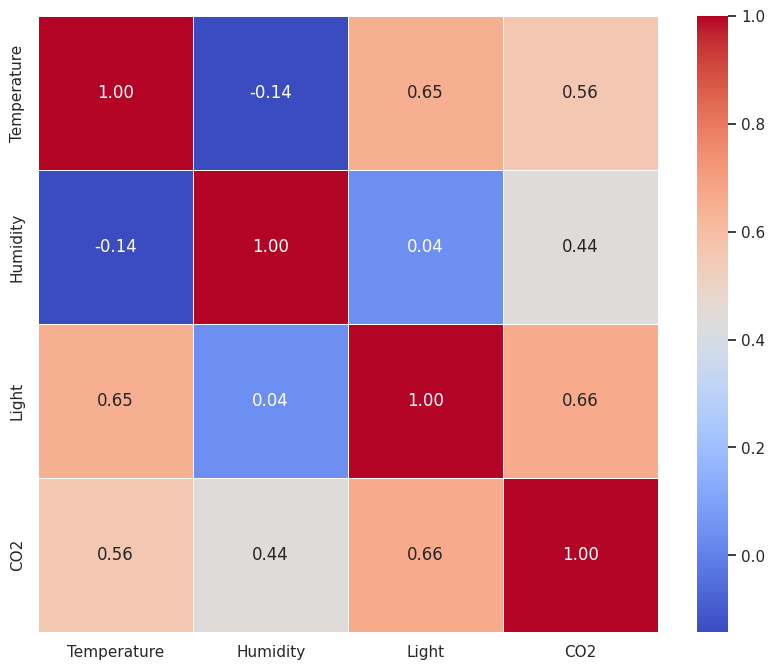

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = odd.select(feature_columns).toPandas().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


In [57]:
from pyspark.sql.functions import col

# Use IQR to identify outliers
q1 = odd.approxQuantile('Temperature', [0.25], 0.05)[0]
q3 = odd.approxQuantile('Temperature', [0.75], 0.05)[0]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = odd.filter((col('Temperature') < lower_bound) | (col('Temperature') > upper_bound)).count()
outliers



0

In [58]:
occupancy_percentage = odd.groupBy('Occupancy').count().withColumn('Percentage', col('count') / odd.count() * 100).show()


+---------+-----+------------------+
|Occupancy|count|        Percentage|
+---------+-----+------------------+
|        1| 1729|21.232960825248682|
|        0| 6414| 78.76703917475132|
+---------+-----+------------------+



## Data Preparation

---


---



In [59]:
# SCALING THE FEATURES
feature_columns = ['Temperature', 'Humidity', 'Light', 'CO2']

# Step 1: VectorAssembler to create a feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Step 2: StandardScaler for feature scaling
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Create a pipeline for these steps
pipeline = Pipeline(stages=[assembler, scaler])

# Fit the pipeline to your data
pipeline_model = pipeline.fit(odd)

# Apply the transformation to the DataFrame
scaled_data = pipeline_model.transform(odd)

# Display the scaled features
scaled_data.select("features", "scaled_features").show(truncate=False)


+------------------------------+-------------------------------------------------------------------------------+
|features                      |scaled_features                                                                |
+------------------------------+-------------------------------------------------------------------------------+
|[23.18,27.272,426.0,721.25]   |[2.5183154250568953,0.27850912100136715,1.573666190867261,0.3649256706879749]  |
|[23.15,27.2675,429.5,714.0]   |[2.4888144761223794,0.2776955559429484,1.5916374138745806,0.3418600694718053]  |
|[23.15,27.245,426.0,713.5]    |[2.4888144761223794,0.2736277306508554,1.573666190867261,0.3402693383534488]   |
|[23.15,27.2,426.0,708.25]     |[2.4888144761223794,0.2654920800666681,1.573666190867261,0.3235666616107053]   |
|[23.1,27.2,426.0,704.5]       |[2.439646227898191,0.2654920800666681,1.573666190867261,0.3116361782230314]    |
|[23.1,27.2,419.0,701.0]       |[2.439646227898191,0.2654920800666681,1.5377237448526215,0.30050

In [60]:
# Train - Test split
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)


In [61]:
# Since it is a classification problem the first algorithm we can apply is LogisticRegression
from pyspark.ml.classification import LogisticRegression

classifier = LogisticRegression(featuresCol='scaled_features', labelCol='Occupancy')


In [62]:
model = classifier.fit(train_data)


In [63]:
predictions = model.transform(test_data)


In [64]:
# Evaluate the model's performance
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='Occupancy', metricName='areaUnderROC')
auc = evaluator.evaluate(predictions)
print(f"Area Under ROC: {auc}")


Area Under ROC: 0.9901410187291633


In [65]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='Occupancy', metricName='accuracy')

accuracy = evaluator_accuracy.evaluate(predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9845559845559846


In [66]:
predictions.select('Occupancy', 'prediction', 'probability').show(truncate=False)


+---------+----------+------------------------------------------+
|Occupancy|prediction|probability                               |
+---------+----------+------------------------------------------+
|1        |0.0       |[0.7587997593546583,0.24120024064534173]  |
|1        |0.0       |[0.785541631245586,0.21445836875441404]   |
|1        |0.0       |[0.7989265508374167,0.2010734491625833]   |
|1        |0.0       |[0.7877954738489493,0.21220452615105068]  |
|0        |0.0       |[0.9999654930768864,3.450692311357528E-5] |
|0        |0.0       |[0.9999658760010565,3.4123998943536016E-5]|
|0        |0.0       |[0.9999620119115017,3.798808849830859E-5] |
|0        |0.0       |[0.9999521297904963,4.787020950369758E-5] |
|0        |0.0       |[0.9999524956057738,4.7504394226183244E-5]|
|0        |0.0       |[0.9999537793269823,4.6220673017738356E-5]|
|0        |0.0       |[0.9999456848777052,5.431512229481239E-5] |
|0        |0.0       |[0.9999487522451048,5.124775489517841E-5] |
|0        

In [67]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [68]:
rf_classifier = RandomForestClassifier(featuresCol='scaled_features', labelCol='Occupancy', numTrees=100, seed=42)
rf_model = rf_classifier.fit(train_data)  # Assuming 'train_data' is already defined
rf_predictions = rf_model.transform(test_data)

In [69]:
rf_evaluator_roc = BinaryClassificationEvaluator(labelCol='Occupancy', metricName='areaUnderROC')
roc_auc = rf_evaluator_roc.evaluate(rf_predictions)
print(f"Area Under ROC for Random Forest: {roc_auc}")

Area Under ROC for Random Forest: 0.9987718581447806


In [70]:
# Evaluate the Model (Accuracy)
rf_evaluator_accuracy = MulticlassClassificationEvaluator(labelCol='Occupancy', metricName='accuracy')
accuracy = rf_evaluator_accuracy.evaluate(rf_predictions)
print(f"Accuracy for Random Forest: {accuracy}")

Accuracy for Random Forest: 0.9916344916344917


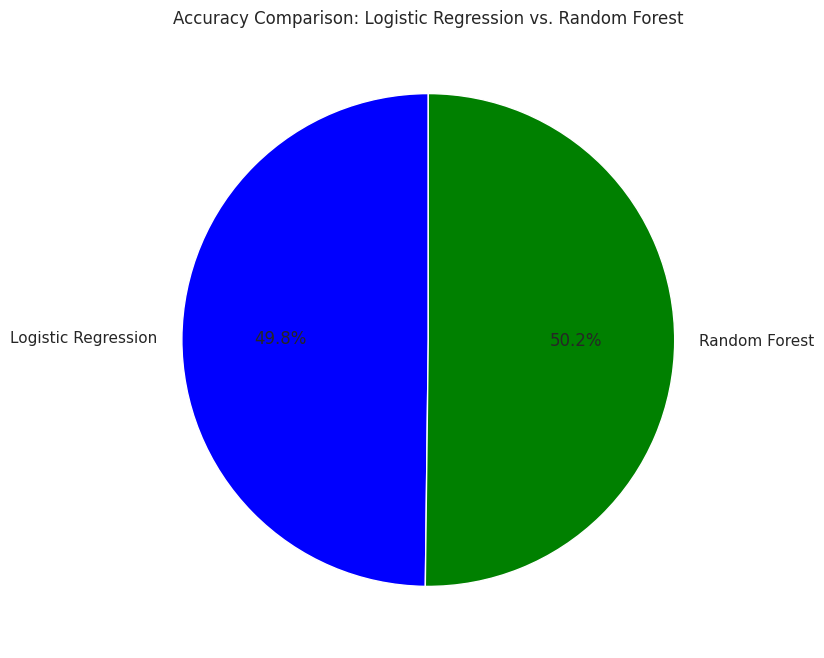

In [72]:
logistic_regression_accuracy = 98.4
random_forest_accuracy = 99.16

# Model names
models = ['Logistic Regression', 'Random Forest']

# Accuracy values
accuracies = [logistic_regression_accuracy, random_forest_accuracy]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
plt.title('Accuracy Comparison: Logistic Regression vs. Random Forest')
plt.show()
